### Importing necessary libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading input data

In [70]:
cust=pd.read_csv("C:/Users/krish/Documents/UoH/datasets tableau project/Mall_Customers.csv")

### Summary of data

In [71]:
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
cust.shape

(200, 5)

In [73]:
cust.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Descriptive statistics

In [74]:
cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### EDA

Let us drop customerID since it does not add to our model performance

In [75]:
cust_new=cust.drop(['CustomerID'],axis=1)

In [76]:
cust_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [77]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivy='all'

In [78]:
gender_distri=cust_new.Gender.value_counts()
gender_distri

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 0, 'Gender')

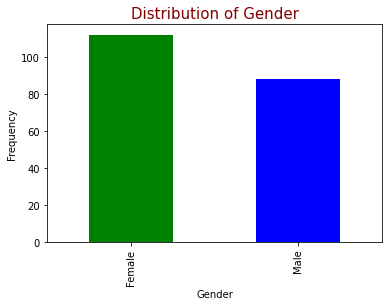

In [79]:
gender_distri.plot(kind='bar',color=['green','blue'])
plt.title('Distribution of Gender',fontsize=15,color='maroon')
plt.ylabel('Frequency')
plt.xlabel('Gender')

More female data points are present in the data

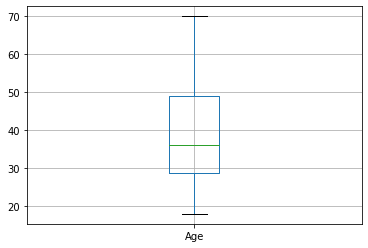

In [80]:
cust_new.Age.plot.box(grid=True)

No outliers found w.r.to age

In [81]:
age_0_18=cust_new.Age[(cust_new['Age']<=18)]
age_19_36=cust_new.Age[(cust_new['Age']>18)&(cust_new['Age']<=36)]
age_37_54=cust_new.Age[(cust_new['Age']>37)&(cust_new['Age']<=54)]
age_54_72=cust_new.Age[(cust_new['Age']>54)&(cust_new['Age']<=72)]

In [82]:
age_x=['0-18','19-36','37-54','54-72']
age_y=[len(age_0_18),len(age_19_36),len(age_37_54),len(age_54_72)]

Text(0, 0.5, 'Frequency')

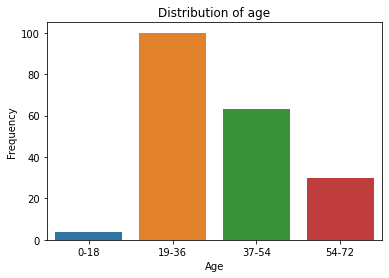

In [83]:
sns.barplot(x=age_x,y=age_y)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')

More data points found between 19-36yrs of age and few between 0-18yrs of age.

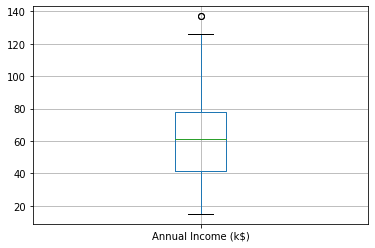

In [84]:
cust_new['Annual Income (k$)'].plot.box(grid=True)

An outlier data point found 1.5*IQR units beyound Q3.

In [85]:
annual_income_0_40=cust_new['Annual Income (k$)'][(cust_new['Annual Income (k$)']<=40)]
annual_income_41_80=cust_new['Annual Income (k$)'][(cust_new['Annual Income (k$)']>41)&(cust_new['Annual Income (k$)']<=80)]
annual_income_81_120=cust_new['Annual Income (k$)'][(cust_new['Annual Income (k$)']>81)&(cust_new['Annual Income (k$)']<=120)]
annual_income_121_160=cust_new['Annual Income (k$)'][(cust_new['Annual Income (k$)']>121)&(cust_new['Annual Income (k$)']<=160)]

In [86]:
ai_x=['0-40','41-80','81-120','121-160']
ai_y=[len(annual_income_0_40),len(annual_income_41_80),len(annual_income_81_120),len(annual_income_121_160)]

Text(0, 0.5, 'Frequency')

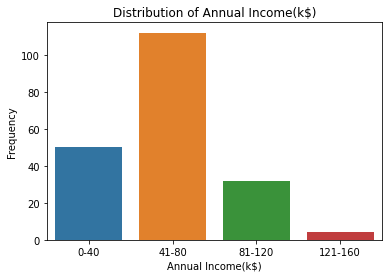

In [87]:
sns.barplot(x=ai_x,y=ai_y)
plt.title('Distribution of Annual Income(k$)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Frequency')

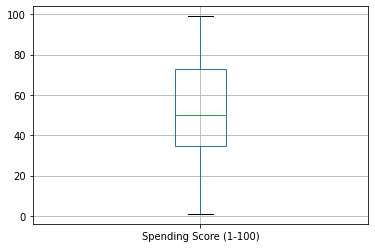

In [88]:
cust_new['Spending Score (1-100)'].plot.box(grid=True)

No outliers found in spending scores data

In [89]:
spending_scores_0_25=cust_new['Spending Score (1-100)'][(cust_new['Spending Score (1-100)']<=25)]
spending_scores_26_50=cust_new['Spending Score (1-100)'][(cust_new['Spending Score (1-100)']>26)&(cust_new['Spending Score (1-100)']<=50)]
spending_scores_51_75=cust_new['Spending Score (1-100)'][(cust_new['Spending Score (1-100)']>51)&(cust_new['Spending Score (1-100)']<=75)]
spending_scores_76_100=cust_new['Spending Score (1-100)'][(cust_new['Spending Score (1-100)']>76)&(cust_new['Spending Score (1-100)']<=100)]

In [90]:
ss_x=['0-25','26-50','51-75','76-100']
ss_y=[len(spending_scores_0_25),len(spending_scores_26_50),len(spending_scores_51_75),len(spending_scores_76_100)]

Text(0, 0.5, 'Frequency')

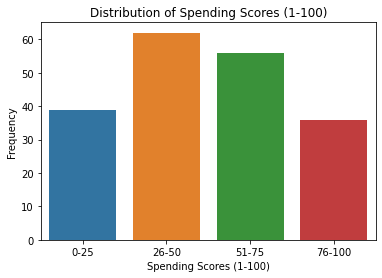

In [91]:
sns.barplot(x=ss_x,y=ss_y)
plt.title('Distribution of Spending Scores (1-100)')
plt.xlabel('Spending Scores (1-100)')
plt.ylabel('Frequency')

In [109]:
#plt.bar(age_x,list(map(int,ai_y)),color='g',align='edge',width=0.4)
#plt.bar(age_x,list(map(int,ss_y)),align='edge',color='y',width=-0.4)
#plt.show()

Text(0, 0.5, 'Spending Scores (1-100)')

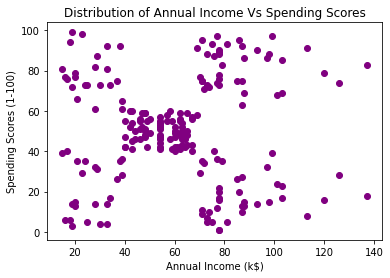

In [134]:
plt.scatter(cust_new['Annual Income (k$)'],cust_new['Spending Score (1-100)'],color='purple')
plt.title('Distribution of Annual Income Vs Spending Scores')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Scores (1-100)')

### Determining K-value:

C:\Users\krish\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


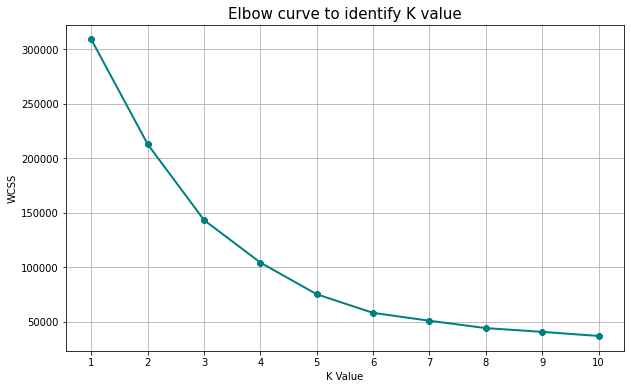

In [144]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cust_new.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="teal", marker ="8")
plt.title('Elbow curve to identify K value',fontsize=15)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

### Applying K-MEANS to cluster the data

In [146]:
km=KMeans(n_clusters=5)
clusters=km.fit_predict(cust_new.iloc[:,1:])
cust_new['label']=clusters

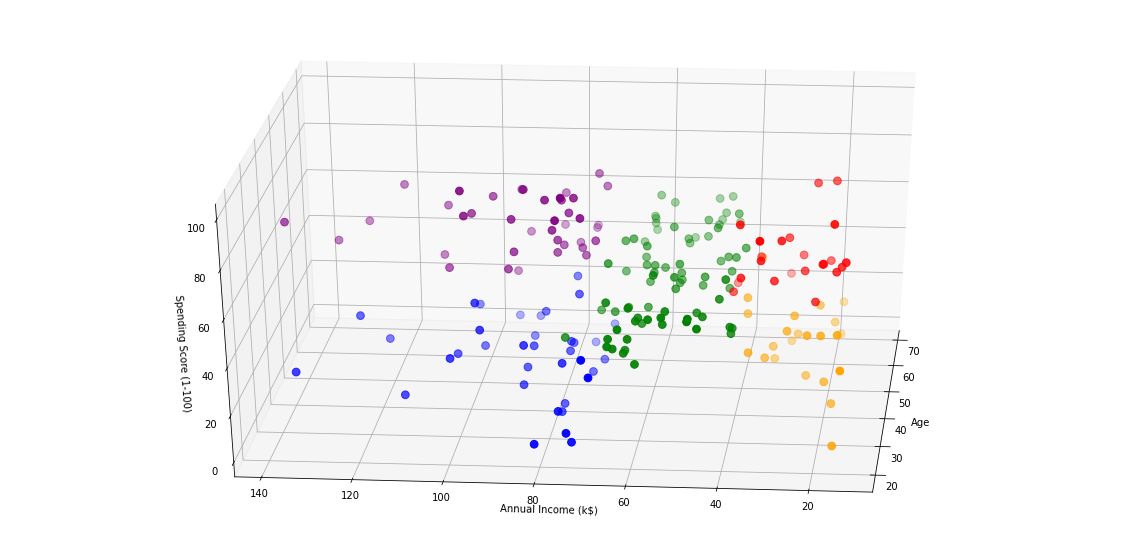

In [149]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_new.Age[cust_new.label == 0], cust_new["Annual Income (k$)"][cust_new.label == 0], cust_new["Spending Score (1-100)"][cust_new.label == 0], c='blue', s=60)
ax.scatter(cust_new.Age[cust_new.label == 1], cust_new["Annual Income (k$)"][cust_new.label == 1], cust_new["Spending Score (1-100)"][cust_new.label == 1], c='red', s=60)
ax.scatter(cust_new.Age[cust_new.label == 2], cust_new["Annual Income (k$)"][cust_new.label == 2], cust_new["Spending Score (1-100)"][cust_new.label == 2], c='green', s=60)
ax.scatter(cust_new.Age[cust_new.label == 3], cust_new["Annual Income (k$)"][cust_new.label == 3], cust_new["Spending Score (1-100)"][cust_new.label == 3], c='orange', s=60)
ax.scatter(cust_new.Age[cust_new.label == 4], cust_new["Annual Income (k$)"][cust_new.label == 4], cust_new["Spending Score (1-100)"][cust_new.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()